In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
firstcamp_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\First_Health_Camp_Attended.csv")

In [3]:
campdetail_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\Health_Camp_Detail.csv")

In [4]:
patientprofile_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\Patient_Profile.csv")
secondcamp_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\Second_Health_Camp_Attended.csv")
test_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\test.csv")
thirdcamp_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\Third_Health_Camp_Attended.csv")
train_df=pd.read_csv(r"C:\Users\gopin\Desktop\Tutorial\dataset\Health care\Train.csv")

In [5]:
campdetail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Health_Camp_ID   65 non-null     int64 
 1   Camp_Start_Date  65 non-null     object
 2   Camp_End_Date    65 non-null     object
 3   Category1        65 non-null     object
 4   Category2        65 non-null     object
 5   Category3        65 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ KB


In [6]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1


In [7]:
from datetime import datetime

In [8]:
campdetail_df["Camp_Start_Date"]=campdetail_df["Camp_Start_Date"].apply(lambda x:datetime.strptime(x,"%d-%b-%y"))

In [9]:
campdetail_df["Camp_End_Date"]=campdetail_df["Camp_End_Date"].apply(lambda x:datetime.strptime(x,"%d-%b-%y"))

In [10]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1


In [11]:
campdetail_df[['Camp_Start_Date','Camp_End_Date']]

,Camp_Start_Date,Camp_End_Date
0,2003-08-16,2003-08-20
1,2003-08-16,2003-10-28
2,2003-11-03,2003-11-15
3,2003-11-22,2003-12-05
4,2003-11-30,2003-12-18
...,...,...
60,2006-11-09,2006-12-15
61,2006-11-13,2006-11-18
62,2006-12-11,2007-03-12
63,2007-01-30,2007-02-04


In [12]:
campdetail_df["Category1"]=campdetail_df["Category1"]+"_cat1"
campdetail_df["Category2"]=campdetail_df["Category2"]+"_cat2"
campdetail_df["Category3"]=campdetail_df["Category3"].apply(lambda x:str(x)+'_cat3')


In [13]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First_cat1,B_cat2,2_cat3
1,6530,2003-08-16,2003-10-28,First_cat1,C_cat2,2_cat3
2,6544,2003-11-03,2003-11-15,First_cat1,F_cat2,1_cat3
3,6585,2003-11-22,2003-12-05,First_cat1,E_cat2,2_cat3
4,6561,2003-11-30,2003-12-18,First_cat1,E_cat2,1_cat3


In [14]:
#identifying duplicates in health camp id
campdetail_df["Health_Camp_ID"].value_counts()

6528    1
6561    1
6563    1
6564    1
6565    1
       ..
6555    1
6556    1
6557    1
6558    1
6527    1
Name: Health_Camp_ID, Length: 65, dtype: int64

In [15]:
sum(campdetail_df["Health_Camp_ID"].value_counts()>1)

0

In [16]:
campdetail_df[campdetail_df["Camp_End_Date"]<campdetail_df["Camp_Start_Date"]] #checking whether starting date is greater than ending date

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3


In [17]:
campdetail_df["New_Start_month"]=campdetail_df["Camp_Start_Date"].apply(lambda x:x.month) # Get month from start date and store in new column

In [18]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,New_Start_month
0,6560,2003-08-16,2003-08-20,First_cat1,B_cat2,2_cat3,8
1,6530,2003-08-16,2003-10-28,First_cat1,C_cat2,2_cat3,8
2,6544,2003-11-03,2003-11-15,First_cat1,F_cat2,1_cat3,11
3,6585,2003-11-22,2003-12-05,First_cat1,E_cat2,2_cat3,11
4,6561,2003-11-30,2003-12-18,First_cat1,E_cat2,1_cat3,11


In [19]:
campdetail_df["New_Start_day"]=campdetail_df["Camp_Start_Date"].apply(lambda x:x.day) #  Get day from start date 

In [20]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,New_Start_month,New_Start_day
0,6560,2003-08-16,2003-08-20,First_cat1,B_cat2,2_cat3,8,16
1,6530,2003-08-16,2003-10-28,First_cat1,C_cat2,2_cat3,8,16
2,6544,2003-11-03,2003-11-15,First_cat1,F_cat2,1_cat3,11,3
3,6585,2003-11-22,2003-12-05,First_cat1,E_cat2,2_cat3,11,22
4,6561,2003-11-30,2003-12-18,First_cat1,E_cat2,1_cat3,11,30


In [21]:
campdetail_df["New_Start_quarter"]=campdetail_df["Camp_Start_Date"].apply(lambda x:x.quarter) 

In [22]:
campdetail_df["New_End_day"]=campdetail_df["Camp_End_Date"].apply(lambda x:x.day)

In [23]:
campdetail_df["New_End_month"]=campdetail_df["Camp_End_Date"].apply(lambda x:x.month)

In [24]:
campdetail_df["New_End_quarter"]=campdetail_df["Camp_End_Date"].apply(lambda x:x.quarter)

In [25]:
campdetail_df["duration"]=(campdetail_df["Camp_End_Date"]-campdetail_df["Camp_Start_Date"]).astype('timedelta64[D]')

In [26]:
campdetail_df.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,New_Start_month,New_Start_day,New_Start_quarter,New_End_day,New_End_month,New_End_quarter,duration
0,6560,2003-08-16,2003-08-20,First_cat1,B_cat2,2_cat3,8,16,3,20,8,3,4.0
1,6530,2003-08-16,2003-10-28,First_cat1,C_cat2,2_cat3,8,16,3,28,10,4,73.0
2,6544,2003-11-03,2003-11-15,First_cat1,F_cat2,1_cat3,11,3,4,15,11,4,12.0
3,6585,2003-11-22,2003-12-05,First_cat1,E_cat2,2_cat3,11,22,4,5,12,4,13.0
4,6561,2003-11-30,2003-12-18,First_cat1,E_cat2,1_cat3,11,30,4,18,12,4,18.0


In [27]:
Category1_dummies=pd.get_dummies(campdetail_df["Category1"])

In [28]:
Category1_dummies

,First_cat1,Second_cat1,Third_cat1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
60,1,0,0
61,0,1,0
62,1,0,0
63,0,1,0


In [29]:
campdetail_df=pd.concat([campdetail_df,Category1_dummies],axis=1)

In [30]:
campdetail_df=campdetail_df.drop("Category1",axis=1)

In [31]:
campdetail_df.head(5)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category2,Category3,New_Start_month,New_Start_day,New_Start_quarter,New_End_day,New_End_month,New_End_quarter,duration,First_cat1,Second_cat1,Third_cat1
0,6560,2003-08-16,2003-08-20,B_cat2,2_cat3,8,16,3,20,8,3,4.0,1,0,0
1,6530,2003-08-16,2003-10-28,C_cat2,2_cat3,8,16,3,28,10,4,73.0,1,0,0
2,6544,2003-11-03,2003-11-15,F_cat2,1_cat3,11,3,4,15,11,4,12.0,1,0,0
3,6585,2003-11-22,2003-12-05,E_cat2,2_cat3,11,22,4,5,12,4,13.0,1,0,0
4,6561,2003-11-30,2003-12-18,E_cat2,1_cat3,11,30,4,18,12,4,18.0,1,0,0


In [32]:
Category2_dummies=pd.get_dummies(campdetail_df["Category2"])

In [33]:
campdetail_df=pd.concat([campdetail_df,Category2_dummies],axis=1)
campdetail_df=campdetail_df.drop("Category2",axis=1)


In [34]:
campdetail_df.head(1)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category3,New_Start_month,New_Start_day,New_Start_quarter,New_End_day,New_End_month,New_End_quarter,...,First_cat1,Second_cat1,Third_cat1,A_cat2,B_cat2,C_cat2,D_cat2,E_cat2,F_cat2,G_cat2
0,6560,2003-08-16,2003-08-20,2_cat3,8,16,3,20,8,3,...,1,0,0,0,1,0,0,0,0,0


In [35]:
Category3_dummies=pd.get_dummies(campdetail_df["Category3"])
campdetail_df=pd.concat([campdetail_df,Category3_dummies],axis=1)
campdetail_df=campdetail_df.drop("Category3",axis=1)

In [36]:
campdetail_df.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,New_Start_month,New_Start_day,New_Start_quarter,New_End_day,New_End_month,New_End_quarter,duration,...,Third_cat1,A_cat2,B_cat2,C_cat2,D_cat2,E_cat2,F_cat2,G_cat2,1_cat3,2_cat3
0,6560,2003-08-16,2003-08-20,8,16,3,20,8,3,4.0,...,0,0,1,0,0,0,0,0,0,1
1,6530,2003-08-16,2003-10-28,8,16,3,28,10,4,73.0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
campdetail_df["weekends"]=[pd.date_range(x,y).weekday.isin([5,6]).sum() for x,y in zip(campdetail_df["Camp_Start_Date"],campdetail_df["Camp_End_Date"])]

In [38]:
campdetail_df.head(5)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,New_Start_month,New_Start_day,New_Start_quarter,New_End_day,New_End_month,New_End_quarter,duration,...,A_cat2,B_cat2,C_cat2,D_cat2,E_cat2,F_cat2,G_cat2,1_cat3,2_cat3,weekends
0,6560,2003-08-16,2003-08-20,8,16,3,20,8,3,4.0,...,0,1,0,0,0,0,0,0,1,2
1,6530,2003-08-16,2003-10-28,8,16,3,28,10,4,73.0,...,0,0,1,0,0,0,0,0,1,22
2,6544,2003-11-03,2003-11-15,11,3,4,15,11,4,12.0,...,0,0,0,0,0,1,0,1,0,3
3,6585,2003-11-22,2003-12-05,11,22,4,5,12,4,13.0,...,0,0,0,0,1,0,0,0,1,4
4,6561,2003-11-30,2003-12-18,11,30,4,18,12,4,18.0,...,0,0,0,0,1,0,0,1,0,5


In [39]:
campdetail_df.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'New_Start_month',
       'New_Start_day', 'New_Start_quarter', 'New_End_day', 'New_End_month',
       'New_End_quarter', 'duration', 'First_cat1', 'Second_cat1',
       'Third_cat1', 'A_cat2', 'B_cat2', 'C_cat2', 'D_cat2', 'E_cat2',
       'F_cat2', 'G_cat2', '1_cat3', '2_cat3', 'weekends'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_Start_quarter', ylabel='count'>

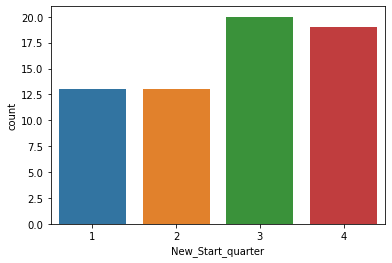

In [40]:
sns.countplot("New_Start_quarter",data=campdetail_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_End_quarter', ylabel='count'>

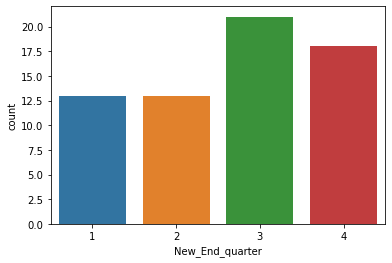

In [41]:
sns.countplot("New_End_quarter",data=campdetail_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New_Start_month', ylabel='count'>

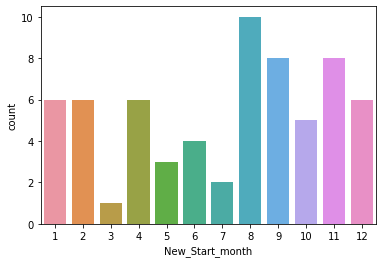

In [42]:
sns.countplot("New_Start_month",data=campdetail_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

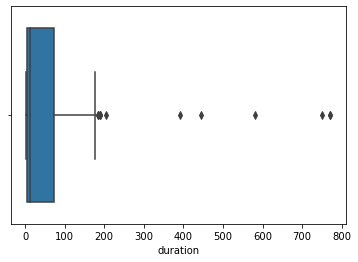

In [43]:
sns.boxplot(campdetail_df["duration"])

# Patient profile

In [44]:
patientprofile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         37633 non-null  int64 
 1   Online_Follower    37633 non-null  int64 
 2   LinkedIn_Shared    37633 non-null  int64 
 3   Twitter_Shared     37633 non-null  int64 
 4   Facebook_Shared    37633 non-null  int64 
 5   Income             37633 non-null  object
 6   Education_Score    37633 non-null  object
 7   Age                37633 non-null  object
 8   First_Interaction  37633 non-null  object
 9   City_Type          14249 non-null  object
 10  Employer_Category  2840 non-null   object
dtypes: int64(5), object(6)
memory usage: 3.2+ MB


In [45]:
patientprofile_df.head(5)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others


In [46]:
patientprofile_df["First_Interaction"]=patientprofile_df["First_Interaction"].apply(lambda x:datetime.strptime(x,"%d-%b-%y"))

In [47]:
patientprofile_df.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,2003-06-18,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,2003-07-20,H,Software Industry
2,508307,0,0,0,0,3,87,46,2002-11-02,D,BFSI
3,512612,0,0,0,0,1,75,47,2002-11-02,D,Education
4,521075,0,0,0,0,3,None,80,2002-11-24,H,Others


In [48]:
patientprofile_df["Month_first_interaction"]=patientprofile_df["First_Interaction"].apply(lambda x:x.month)

In [49]:
patientprofile_df["Day_first_interaction"]=patientprofile_df["First_Interaction"].apply(lambda x:x.day)
patientprofile_df["Quarter_first_interaction"]=patientprofile_df["First_Interaction"].apply(lambda x:x.quarter)

In [50]:
patientprofile_df.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction
0,516956,0,0,0,0,1,90,39,2003-06-18,NaN,Software Industry,6,18,2
1,507733,0,0,0,0,1,None,40,2003-07-20,H,Software Industry,7,20,3
2,508307,0,0,0,0,3,87,46,2002-11-02,D,BFSI,11,2,4
3,512612,0,0,0,0,1,75,47,2002-11-02,D,Education,11,2,4
4,521075,0,0,0,0,3,None,80,2002-11-24,H,Others,11,24,4


In [51]:
patientprofile_df["Education_Score"]=patientprofile_df["Education_Score"].apply(lambda x: np.nan if x=="None" else x)
patientprofile_df["Age"]=patientprofile_df["Age"].apply(lambda x: np.nan if x=="None" else x)

In [52]:
patientprofile_df["Education_Score"]=pd.to_numeric(patientprofile_df["Education_Score"],downcast="float") 

In [53]:
patientprofile_df["Age"]=pd.to_numeric(patientprofile_df["Age"],downcast="float")

In [54]:
patientprofile_df.head(10)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction
0,516956,0,0,0,0,1,90.0,39.0,2003-06-18,NaN,Software Industry,6,18,2
1,507733,0,0,0,0,1,NaN,40.0,2003-07-20,H,Software Industry,7,20,3
2,508307,0,0,0,0,3,87.0,46.0,2002-11-02,D,BFSI,11,2,4
3,512612,0,0,0,0,1,75.0,47.0,2002-11-02,D,Education,11,2,4
4,521075,0,0,0,0,3,NaN,80.0,2002-11-24,H,Others,11,24,4
5,502103,0,0,0,0,None,NaN,NaN,2003-04-06,NaN,NaN,4,6,2
6,528501,0,0,0,0,None,NaN,NaN,2003-04-26,NaN,NaN,4,26,2
7,519202,0,0,0,0,None,NaN,NaN,2003-04-05,NaN,NaN,4,5,2
8,521359,0,0,0,0,None,NaN,NaN,2003-04-10,F,NaN,4,10,2
9,487977,0,1,1,0,4,72.0,58.0,2003-06-08,G,Technology,6,8,2


In [55]:
patientprofile_df["Socialmedia_interaction"]=patientprofile_df["Online_Follower"]+patientprofile_df["LinkedIn_Shared"]+patientprofile_df["Twitter_Shared"]+patientprofile_df["Facebook_Shared"]

In [56]:
patientprofile_df["Twitter_Shared"].value_counts()

0    36820
1      813
Name: Twitter_Shared, dtype: int64

In [57]:
patientprofile_df.drop(["Online_Follower","LinkedIn_Shared","Twitter_Shared","Facebook_Shared"], axis=1, inplace=True)

In [58]:
patientprofile_df["Income"]=patientprofile_df["Income"].apply(lambda x:str(x)+"_inc")

In [59]:
patientprofile_df.head(5)

,Patient_ID,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction,Socialmedia_interaction
0,516956,1_inc,90.0,39.0,2003-06-18,NaN,Software Industry,6,18,2,0
1,507733,1_inc,NaN,40.0,2003-07-20,H,Software Industry,7,20,3,0
2,508307,3_inc,87.0,46.0,2002-11-02,D,BFSI,11,2,4,0
3,512612,1_inc,75.0,47.0,2002-11-02,D,Education,11,2,4,0
4,521075,3_inc,NaN,80.0,2002-11-24,H,Others,11,24,4,0


In [60]:
patientprofile_df["City_Type"]=patientprofile_df["City_Type"].fillna(value="None")
patientprofile_df["City_Type"]=patientprofile_df["City_Type"]+"_city"

In [61]:
income_dummies=pd.get_dummies(patientprofile_df["Income"],drop_first=True)

In [63]:
income_dummies

,1_inc,2_inc,3_inc,4_inc,5_inc,6_inc,None_inc
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
37628,0,0,0,0,0,0,1
37629,0,0,0,0,0,0,1
37630,0,0,0,0,0,0,1
37631,0,0,0,0,0,0,1


In [65]:
patientprofile_df=pd.concat([patientprofile_df.drop("Income",axis=1),income_dummies],axis=1)

In [66]:
patientprofile_df.head()

,Patient_ID,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction,Socialmedia_interaction,1_inc,2_inc,3_inc,4_inc,5_inc,6_inc,None_inc
0,516956,90.0,39.0,2003-06-18,None_city,Software Industry,6,18,2,0,1,0,0,0,0,0,0
1,507733,NaN,40.0,2003-07-20,H_city,Software Industry,7,20,3,0,1,0,0,0,0,0,0
2,508307,87.0,46.0,2002-11-02,D_city,BFSI,11,2,4,0,0,0,1,0,0,0,0
3,512612,75.0,47.0,2002-11-02,D_city,Education,11,2,4,0,1,0,0,0,0,0,0
4,521075,NaN,80.0,2002-11-24,H_city,Others,11,24,4,0,0,0,1,0,0,0,0


In [67]:
City_Type_dummies=pd.get_dummies(patientprofile_df["City_Type"],drop_first=True)

In [68]:
patientprofile_df=pd.concat([patientprofile_df.drop("City_Type",axis=1),City_Type_dummies],axis=1)

In [69]:
patientprofile_df.head()

,Patient_ID,Education_Score,Age,First_Interaction,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction,Socialmedia_interaction,1_inc,...,None_inc,B_city,C_city,D_city,E_city,F_city,G_city,H_city,I_city,None_city
0,516956,90.0,39.0,2003-06-18,Software Industry,6,18,2,0,1,...,0,0,0,0,0,0,0,0,0,1
1,507733,NaN,40.0,2003-07-20,Software Industry,7,20,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2,508307,87.0,46.0,2002-11-02,BFSI,11,2,4,0,0,...,0,0,0,1,0,0,0,0,0,0
3,512612,75.0,47.0,2002-11-02,Education,11,2,4,0,1,...,0,0,0,1,0,0,0,0,0,0
4,521075,NaN,80.0,2002-11-24,Others,11,24,4,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
 #eda 
bool_df = patientprofile_df['Age']!='None'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

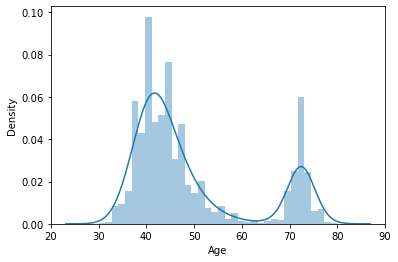

In [73]:
sns.distplot(patientprofile_df['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

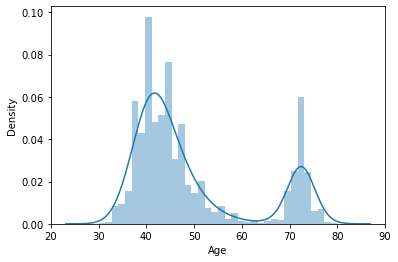

In [76]:
sns.distplot(patientprofile_df[(bool_df)]['Age'])

In [77]:
patientprofile_df.describe()

,Patient_ID,Education_Score,Age,Month_first_interaction,Day_first_interaction,Quarter_first_interaction,Socialmedia_interaction,1_inc,2_inc,3_inc,...,None_inc,B_city,C_city,D_city,E_city,F_city,G_city,H_city,I_city,None_city
count,37633.000000,1384.000000,5015.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,...,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000
mean,507148.408338,78.231316,49.129810,6.389127,15.732549,2.469508,0.094757,0.026918,0.018202,0.009619,...,0.884091,0.070736,0.032312,0.045279,0.032339,0.021683,0.035926,0.066883,0.027529,0.621370
std,12411.747993,8.751691,12.555634,3.489285,8.850992,1.118999,0.481649,0.161846,0.133683,0.097606,...,0.320120,0.256386,0.176830,0.207919,0.176900,0.145649,0.186108,0.249822,0.163621,0.485052
min,485678.000000,45.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496393.000000,72.000000,40.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,507104.000000,79.000000,44.000000,6.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,517882.000000,85.000000,52.000000,9.000000,23.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,528657.000000,101.000000,80.000000,12.000000,31.000000,4.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
patientprofile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient_ID                 37633 non-null  int64         
 1   Education_Score            1384 non-null   float32       
 2   Age                        5015 non-null   float32       
 3   First_Interaction          37633 non-null  datetime64[ns]
 4   Employer_Category          2840 non-null   object        
 5   Month_first_interaction    37633 non-null  int64         
 6   Day_first_interaction      37633 non-null  int64         
 7   Quarter_first_interaction  37633 non-null  int64         
 8   Socialmedia_interaction    37633 non-null  int64         
 9   1_inc                      37633 non-null  uint8         
 10  2_inc                      37633 non-null  uint8         
 11  3_inc                      37633 non-null  uint8         
 12  4_in

In [81]:
patientprofile_df.head()

,Patient_ID,Education_Score,Age,First_Interaction,Employer_Category,Month_first_interaction,Day_first_interaction,Quarter_first_interaction,Socialmedia_interaction,1_inc,...,None_inc,B_city,C_city,D_city,E_city,F_city,G_city,H_city,I_city,None_city
0,516956,90.0,39.0,2003-06-18,Software Industry,6,18,2,0,1,...,0,0,0,0,0,0,0,0,0,1
1,507733,NaN,40.0,2003-07-20,Software Industry,7,20,3,0,1,...,0,0,0,0,0,0,0,1,0,0
2,508307,87.0,46.0,2002-11-02,BFSI,11,2,4,0,0,...,0,0,0,1,0,0,0,0,0,0
3,512612,75.0,47.0,2002-11-02,Education,11,2,4,0,1,...,0,0,0,1,0,0,0,0,0,0
4,521075,NaN,80.0,2002-11-24,Others,11,24,4,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
patientprofile_df["Employer_Category"].value_counts()

Technology           649
Others               477
Consulting           404
Software Industry    374
Education            188
BFSI                 167
Manufacturing        115
Retail                91
Health                88
Transport             65
Telecom               58
Real Estate           57
Food                  56
Broadcasting          51
Name: Employer_Category, dtype: int64

# First camp

In [83]:
firstcamp_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN
2,518680,6560,10,0.048780,NaN
3,509916,6560,30,0.634146,NaN
4,488006,6560,20,0.024390,NaN


In [91]:
firstcamp_df["Unnamed: 4"].value_counts() # dropna -> row, # drop -> column
firstcamp_df = firstcamp_df.drop("Unnamed: 4",axis=1)

In [92]:
firstcamp_df.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


# secondcamp

In [93]:
secondcamp_df.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


# thirdcamp

In [94]:
thirdcamp_df.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


# train

In [105]:
train_df.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [109]:
train_df = train_df.dropna()

In [110]:
from datetime import datetime

train_df["Registration_Date"]=train_df["Registration_Date"].apply(lambda x:datetime.strptime(str(x),'%d-%b-%y'))

In [111]:
train_df.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,2005-09-10,4,0,0,0,2
1,507246,6578,2005-08-18,45,5,0,0,7
